<a href="https://colab.research.google.com/github/M-Abbi/Financial-Modeling/blob/main/K_Means_Clustering_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering: A Simple Explanation

K-Means is an unsupervised learning algorithm used for partitioning a dataset into k distinct, non-overlapping clusters. The goal is to group data points that are similar to each other within a cluster, while being dissimilar to data points in other clusters.

**Key Concepts:**

- Clusters: Groups of data points.
- Centroids: The center of each cluster. In K-Means, the centroid is typically the mean of all the data points in that cluster.
- Distance Metric: A way to measure the similarity or dissimilarity between data points. The most common distance metric used in K-Means is the Euclidean distance.

**How it Works :**

1. Initialization: Randomly select k initial centroids from the dataset.

2. Assignment: Assign each data point to the cluster whose centroid is closest to it, based on the chosen distance metric.

3. Update: Recalculate the centroid of each cluster by taking the mean of all the data points assigned to that cluster.

4. Iteration: Repeat steps 2 and 3 until a stopping criterion is met. Common stopping criteria include:

  - The centroids no longer change significantly between iterations.
  - Data points no longer change their cluster assignments.
  - A maximum number of iterations is reached.

The algorithm aims to minimize the within-cluster sum of squares (WCSS), which is the sum of the squared distances between each data point and its assigned cluster centroid.

**Choosing the Number of Clusters (k):**

Selecting the optimal number of clusters (k) is a crucial step in K-Means. Several techniques can be used, including:

- Elbow Method: Plotting the WCSS for different values of k and looking for an "elbow" point where the rate of decrease in WCSS starts to diminish.
- Silhouette Score: Measuring how well each data point fits into its assigned cluster compared to other clusters.

**Advantages of K-Means:**

- Simple and easy to understand and implement.
- Computationally efficient, especially for large datasets.
- Scalable to large datasets.
- Often works well in practice for discovering cluster structures.

**Disadvantages of K-Means:**

- Sensitive to the initial placement of centroids. Different initializations can lead to different clustering results.
- Assumes clusters are spherical and equally sized. It may not perform well on clusters with complex shapes or varying densities.
- Requires specifying the number of clusters (k) beforehand.
- Sensitive to outliers.

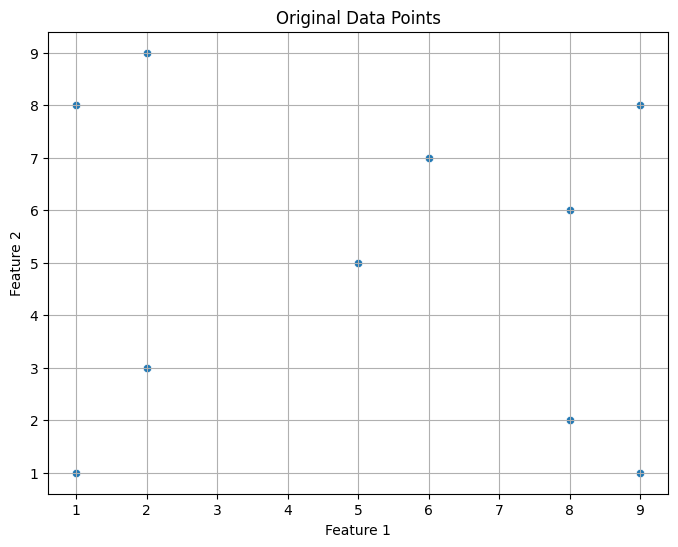

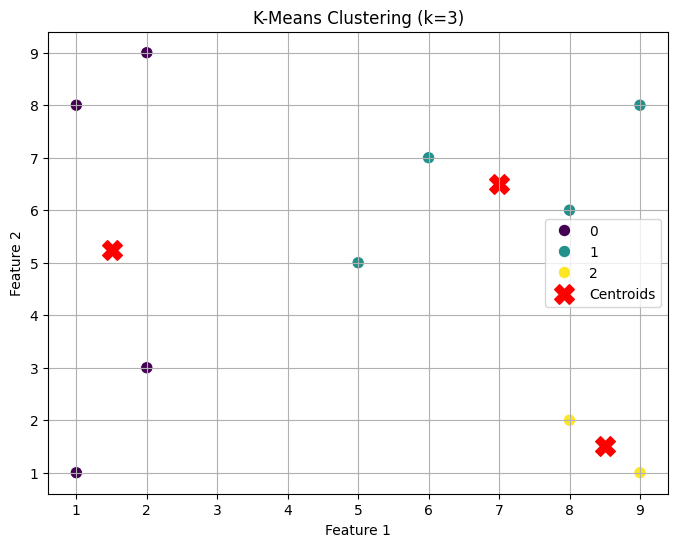


Cluster Assignments:
   Feature_1  Feature_2  Cluster
0          1          1        0
1          2          3        0
2          5          5        1
3          6          7        1
4          8          6        1
5          9          8        1
6          1          8        0
7          2          9        0
8          9          1        2
9          8          2        2

Centroid Coordinates:
[[1.5  5.25]
 [7.   6.5 ]
 [8.5  1.5 ]]

The new point [3, 4] belongs to Cluster: 0


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Create a simple dataset with two features and three potential clusters
data = {'Feature_1': [1, 2, 5, 6, 8, 9, 1, 2, 9, 8],
        'Feature_2': [1, 3, 5, 7, 6, 8, 8, 9, 1, 2]}
df = pd.DataFrame(data)

# Visualize the data
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', data=df)
plt.title('Original Data Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

# Choose the number of clusters (k=3 in this example)
n_clusters = 3

# Create a K-Means clustering model
kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init=10) # n_init to handle initial centroid sensitivity

# Fit the model to the data and get the cluster assignments
df['Cluster'] = kmeans.fit_predict(df[['Feature_1', 'Feature_2']])

# Get the centroids of the clusters
centroids = kmeans.cluster_centers_

# Visualize the clusters and centroids
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Feature_1', y='Feature_2', hue='Cluster', data=df, palette='viridis', s=80)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, color='red', label='Centroids')
plt.title(f'K-Means Clustering (k={n_clusters})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# You can access the cluster assignments for each data point
print("\nCluster Assignments:")
print(df)

# You can access the coordinates of the centroids
print("\nCentroid Coordinates:")
print(centroids)

# Example of predicting the cluster for a new data point
new_point = np.array([[3, 4]])
new_cluster = kmeans.predict(new_point)
print(f"\nThe new point [3, 4] belongs to Cluster: {new_cluster[0]}")